In [1]:
import os
from subprocess import getoutput
import numpy as np

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# The GPU id to use, "0" to  "7"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
#!pip install torchvision
#!pip install torchsummary

In [4]:
import albumentations 
from albumentations.pytorch import ToTensorV2

In [5]:
import sys
sys.path.append("/Users/krithiga.r/Documents/eva6/pytorch-lib/")
print(sys.path)

['/Users/krithiga.r', '/Users/krithiga.r/opt/anaconda3/lib/python38.zip', '/Users/krithiga.r/opt/anaconda3/lib/python3.8', '/Users/krithiga.r/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/krithiga.r/.local/lib/python3.8/site-packages', '/Users/krithiga.r/opt/anaconda3/lib/python3.8/site-packages', '/Users/krithiga.r/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/krithiga.r/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/krithiga.r/.ipython', '/Users/krithiga.r/Documents/eva6/pytorch-lib/']


In [6]:
from woollylib import main
#from woollylib.dataset import get_cifar_loader
#from woollylib.utils.transform import get_transform
from woollylib.utils.utils import get_device
from woollylib.backpropagation import train, test
from woollylib.models.resnet import ResNet18


In [7]:
###where should these go? I have a copy in main.py

batch_size = 64
ricap_beta = 0.4
class_map = {
    'PLANE': 0,
    'CAR': 1,
    'BIRD': 2,
    'CAT': 3,
    'DEER': 4,
    'DOG': 5,
    'FROG': 6,
    'HORSE': 7,
    'SHIP': 8,
    'TRUCK': 9
}

# Enable or disable visualizations
show_summary = True
show_dataset_analyze = True

In [8]:
use_cuda, device = get_device()

In [9]:
from woollylib.main import train_test_load, get_optimizer, get_scheduler

train_loader, test_loader = train_test_load(batch_size, use_cuda, ricap_beta)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
#train_loader, test_loader = get_cifar_loader(get_transform(train_profile), get_transform(normalize), batch_size=batch_size, use_cuda=use_cuda)


In [11]:
epochs = 30
lr = 0.05
max_lr = 0.5
steps_per_epoch = len(train_loader)
dropout = False
drop_ratio = 0.1
use_l1 = False
lambda_l1 = 1e-7
momentum = 0.9
weight_decay = 0.000125
weight_decay = weight_decay/batch_size

norm='ln'
use1x1=True
ctype='depthwise_seperable'
base_channels=16
repetations=1
usedilation=False
use_skip=False
train_function=train
test_function=test

print("Using Device:", device)
print("Epochs:", epochs)
print("Lr:", lr)
print("Max Lr:", max_lr)
print("Batch Size:", batch_size)
print("Dropout:", dropout)
print("Dropout Ratio:", drop_ratio)
print("Momentum:", momentum)
print("Weight Decay:", weight_decay)
print("Use L1:", use_l1)
print("L1 Lambda:", lambda_l1)
print("RICAP Beta", ricap_beta)

Using Device: cpu
Epochs: 30
Lr: 0.05
Max Lr: 0.5
Batch Size: 64
Dropout: False
Dropout Ratio: 0.1
Momentum: 0.9
Weight Decay: 1.953125e-06
Use L1: False
L1 Lambda: 1e-07
RICAP Beta 0.4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

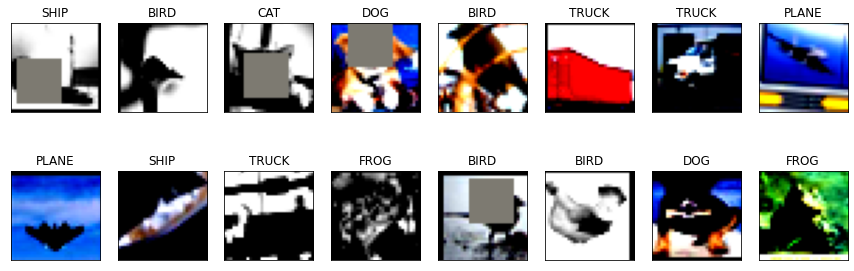

In [12]:
from woollylib.main import get_samples_visualize
get_samples_visualize(show_dataset_analyze, train_loader)

In [17]:
from woollylib.main import get_optimizer, get_scheduler
from woollylib.utils.utils import initialize_weights, print_summary


In [18]:
### To change:

ctrain = train_function(use_l1=use_l1, lambda_l1=lambda_l1)

# Create model instance based on parameter which one to use
model = ResNet18().apply(initialize_weights).to(device)
optimizer, criteria = get_optimizer(model,lr,momentum, weight_decay, device)
custom_scheduler= get_scheduler(epochs, lr, max_lr, optimizer, steps_per_epoch)

from woollylib.training import Training
# Create instance of trainer with all params
trainer = Training(
    model,
    optimizer,
    criteria,
    custom_scheduler,
    ctrain,
    test_function,
    train_loader,
    test_loader,
    lr,
    epochs,
    device,
    dropout
)

if show_summary:
    print_summary(model, input_size=(3, 32, 32))
#     print_modal_summary(trainer.model)
# Run trainer
trainer.run()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

TypeError: forward() takes 2 positional arguments but 3 were given